# Crop Yield Prediction Using Climate Data

## Step 1: Data Acquisition
Load appropriate datasets.

In [12]:
import pandas as pd

# Load datasets
yield_df = pd.read_csv('yield_df.csv')
pesticides = pd.read_csv('pesticides.csv')
rainfall = pd.read_csv('rainfall.csv')
temp = pd.read_csv('temp.csv')
yield_data = pd.read_csv('yield.csv')

# Display the first few rows of each dataset
yield_df.head(), pesticides.head(), rainfall.head(), temp.head(), yield_data.head()

(   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
 0           0  Albania        Maize  1990        36613   
 1           1  Albania     Potatoes  1990        66667   
 2           2  Albania  Rice, paddy  1990        23333   
 3           3  Albania      Sorghum  1990        12500   
 4           4  Albania     Soybeans  1990         7000   
 
    average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
 0                         1485.0              121.0     16.37  
 1                         1485.0              121.0     16.37  
 2                         1485.0              121.0     16.37  
 3                         1485.0              121.0     16.37  
 4                         1485.0              121.0     16.37  ,
            Domain     Area Element                Item  Year  \
 0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
 1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
 2  Pesticides Use  Albania     Use  Pesticides (total)  1

## Step 2: Data Exploration
Examine the dataset's structure and content, identifying key features such as temperature, rainfall, and soil type.

In [13]:
# Explore the structure and content of the datasets
yield_df.info()
yield_df.describe()

pesticides.info()
pesticides.describe()

rainfall.info()
rainfall.describe()

temp.info()
temp.describe()

yield_data.info()
yield_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area 

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


## Step 3: Data Cleaning
Address missing or inconsistent data and standardize units of measurement if necessary.

In [14]:
# Data cleaning
# Check for missing values
yield_df.isnull().sum()
pesticides.isnull().sum()
rainfall.isnull().sum()
temp.isnull().sum()
yield_data.isnull().sum()

# Fill or drop missing values as appropriate
yield_df = yield_df.dropna()
pesticides = pesticides.dropna()
rainfall = rainfall.dropna()
temp = temp.dropna()
yield_data = yield_data.dropna()

# Handle outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

yield_df = remove_outliers(yield_df, 'hg/ha_yield')
yield_df = remove_outliers(yield_df, 'average_rain_fall_mm_per_year')
yield_df = remove_outliers(yield_df, 'pesticides_tonnes')
yield_df = remove_outliers(yield_df, 'avg_temp')

## Step 4: Feature Engineering
Calculate growing degree days or other agronomic indices and incorporate lag features to account for previous periods' climate conditions.

In [15]:
# Feature engineering
# Example: Calculate lag features for temperature and rainfall
yield_df['temp_lag1'] = yield_df['avg_temp'].shift(1)
yield_df['rainfall_lag1'] = yield_df['average_rain_fall_mm_per_year'].shift(1)

# Drop rows with NaN values created by lag features
yield_df = yield_df.dropna()

## Step 5: Exploratory Data Analysis (EDA)
Analyze relationships between climate variables and crop yields, and visualize trends and patterns over time.

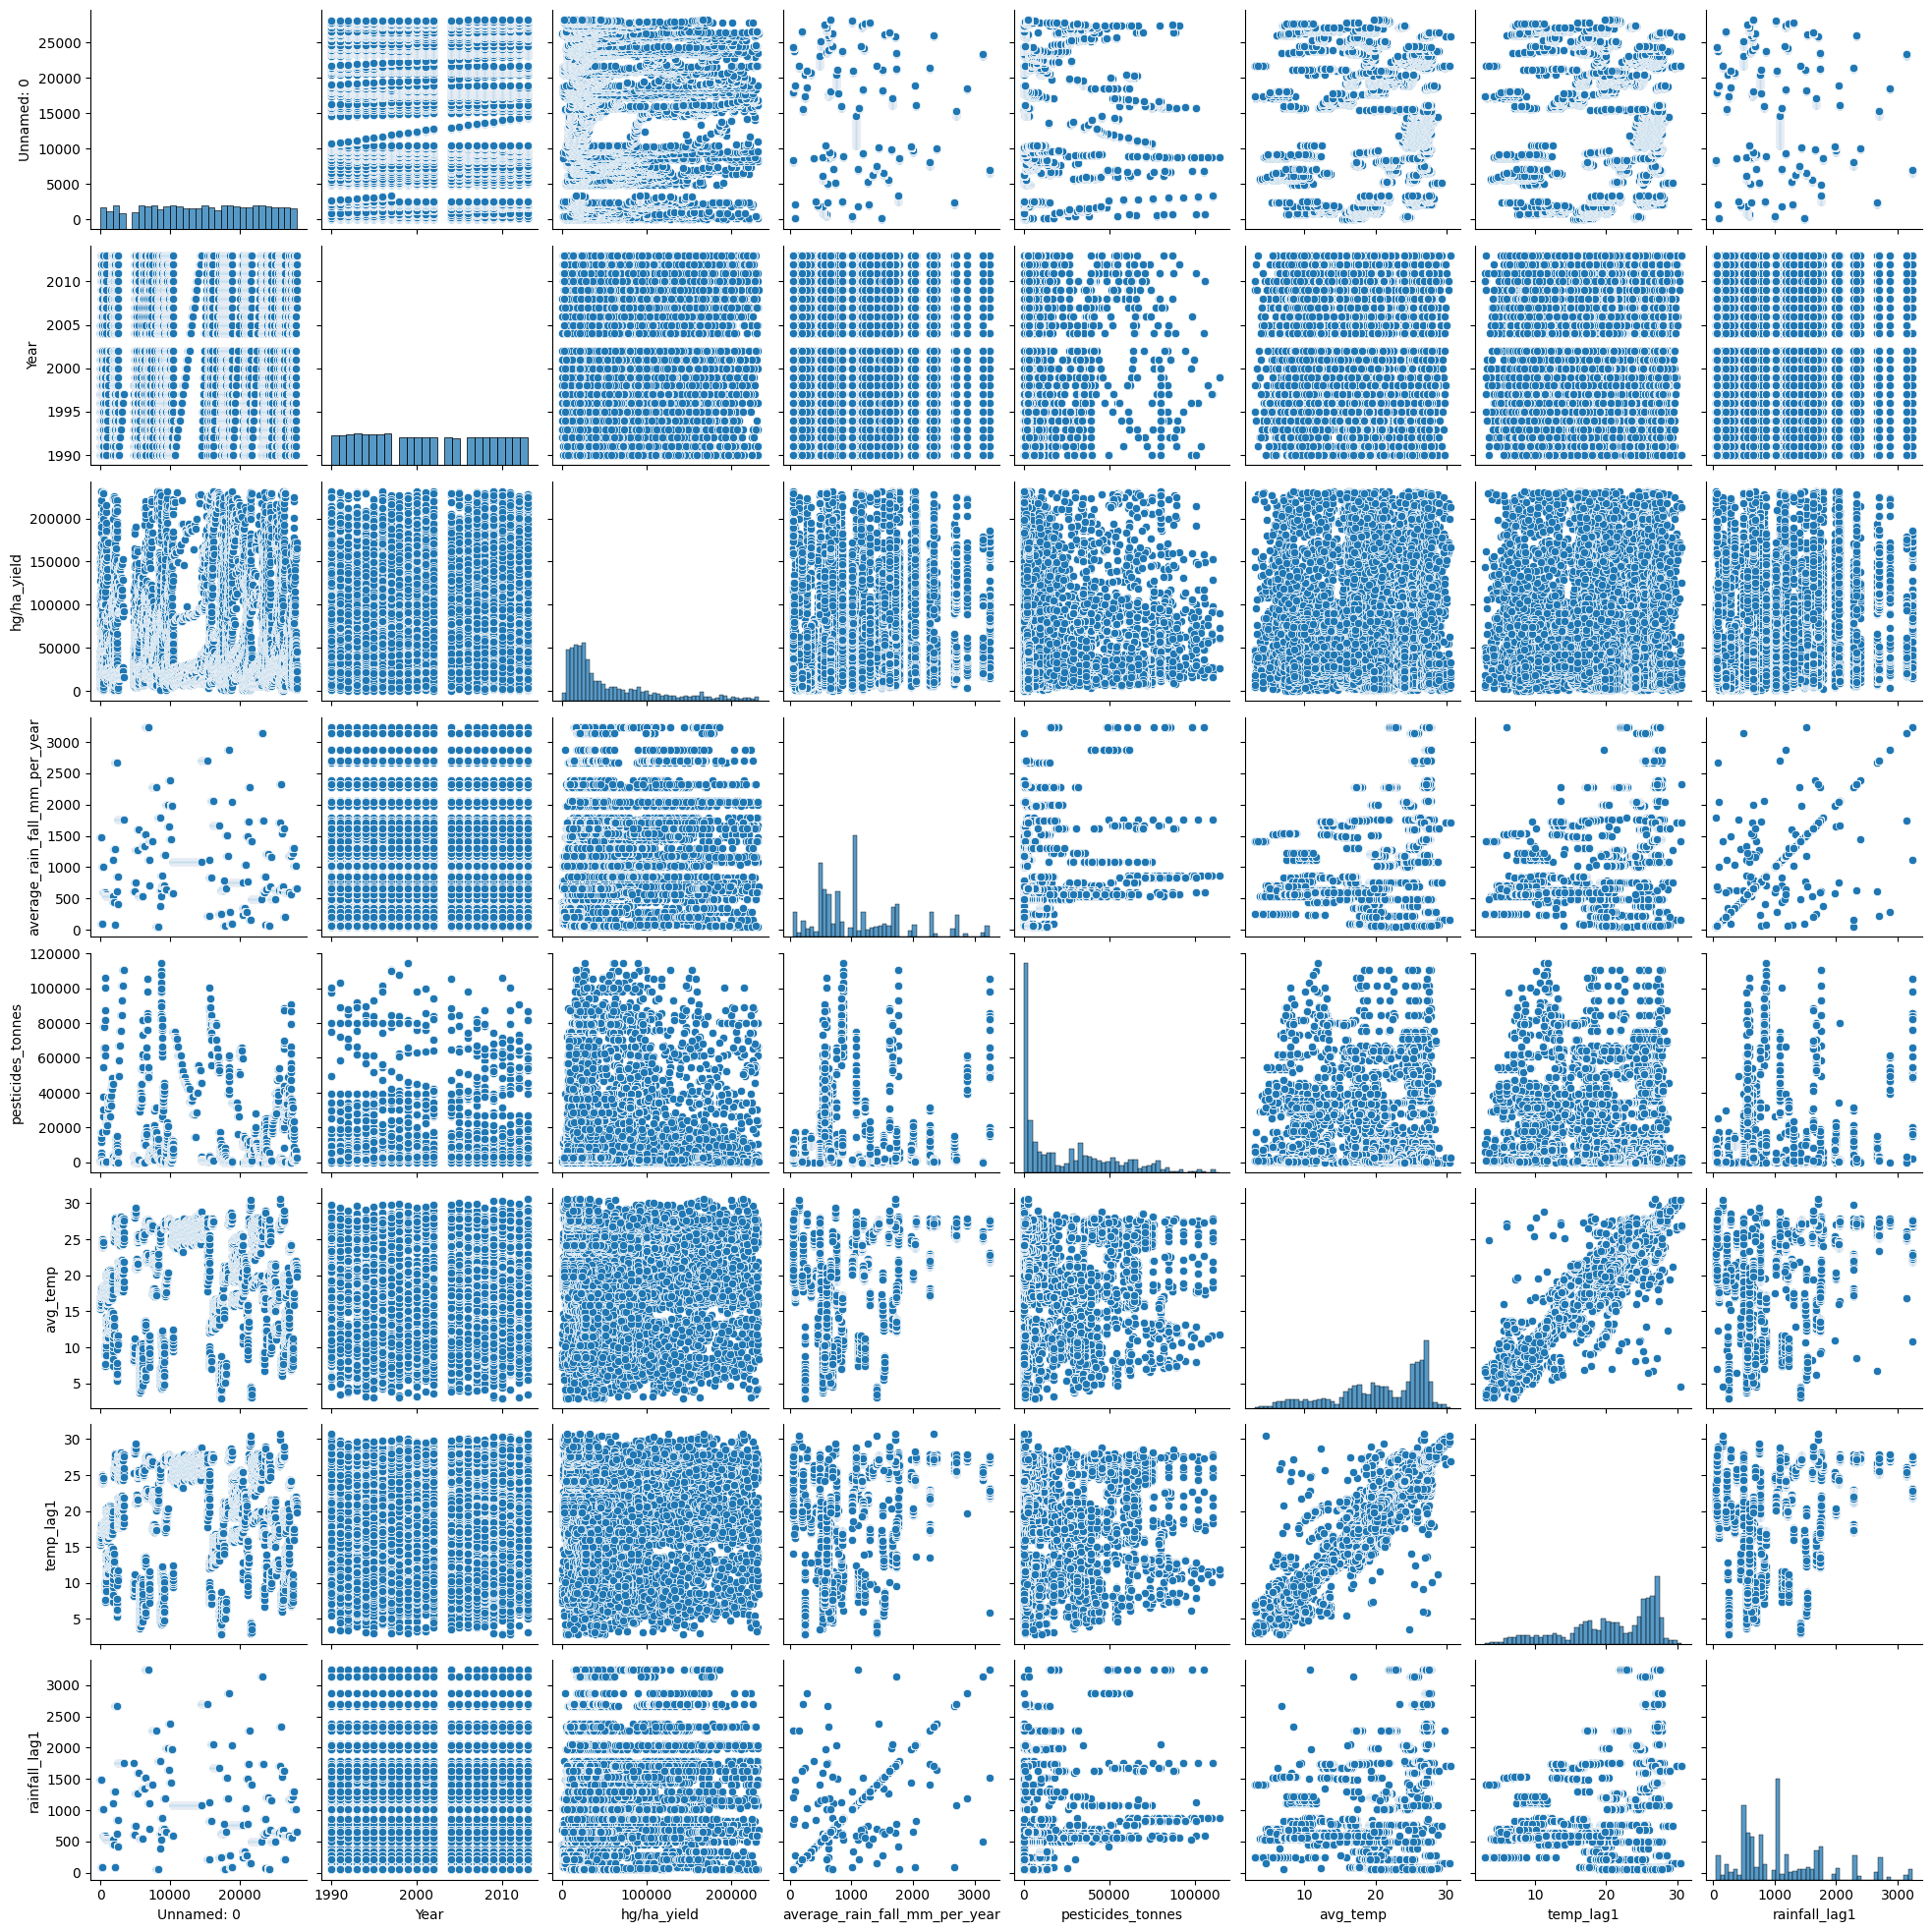

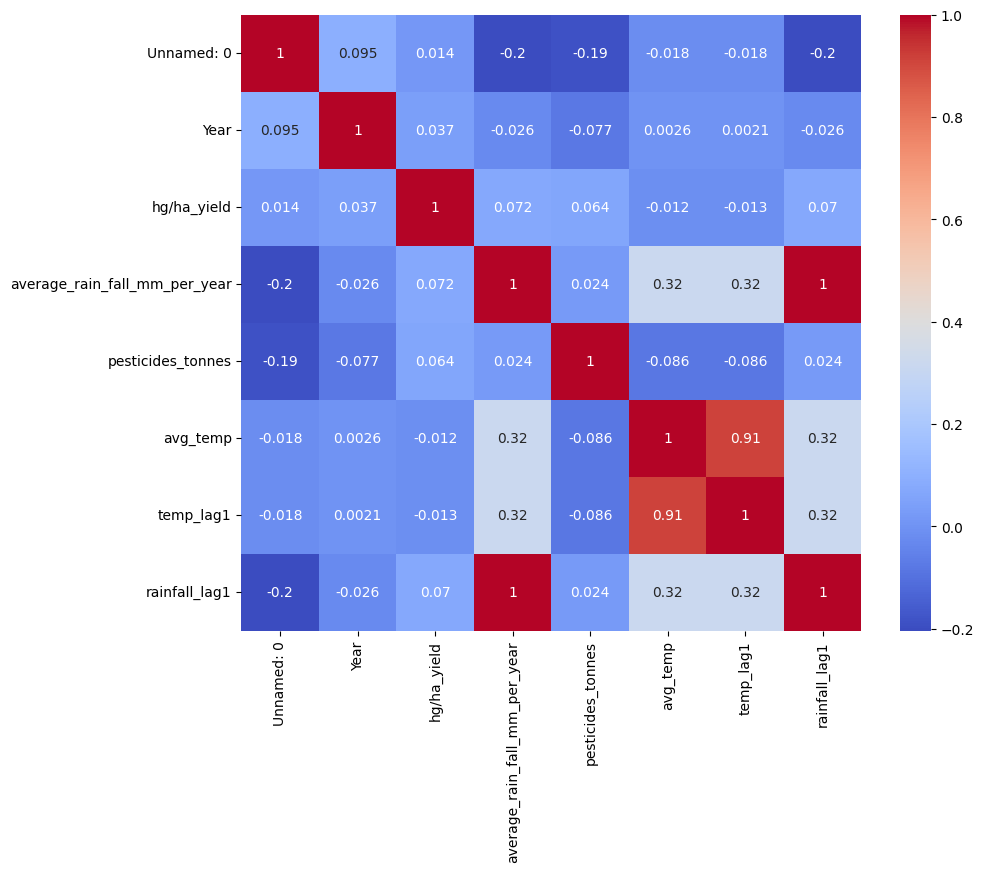

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for visualization
numeric_yield_df = yield_df.select_dtypes(include=['float64', 'int64'])

# Visualize relationships between variables
sns.pairplot(numeric_yield_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_yield_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Step 6: Model Building
Split the data into training and testing sets, apply regression models (e.g., Linear Regression, Random Forest Regressor), and evaluate model performance using metrics like RMSE or MAE.

## Step 6.1: Model Building with Numerical Predictors Only
Split the data into training and testing sets, apply regression models (e.g., Linear Regression, Random Forest Regressor), and evaluate model performance using metrics like RMSE or MAE.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets using only numerical predictors
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'temp_lag1', 'rainfall_lag1']
X_num = yield_df[numerical_features]
y = yield_df['hg/ha_yield']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Apply Linear Regression
lr_num = LinearRegression()
lr_num.fit(X_train_num, y_train_num)
y_pred_lr_num = lr_num.predict(X_test_num)

# Apply Random Forest Regressor
rf_num = RandomForestRegressor(n_estimators=100, random_state=42)
rf_num.fit(X_train_num, y_train_num)
y_pred_rf_num = rf_num.predict(X_test_num)

# Evaluate model performance
rmse_lr_num = mean_squared_error(y_test_num, y_pred_lr_num, squared=False)
mae_lr_num = mean_absolute_error(y_test_num, y_pred_lr_num)
rmse_rf_num = mean_squared_error(y_test_num, y_pred_rf_num, squared=False)
mae_rf_num = mean_absolute_error(y_test_num, y_pred_rf_num)

rmse_lr_num, mae_lr_num, rmse_rf_num, mae_rf_num

/home/wayan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wayan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(55677.61634076276, 44381.71933965671, 64268.076554395215, 49952.27487663273)

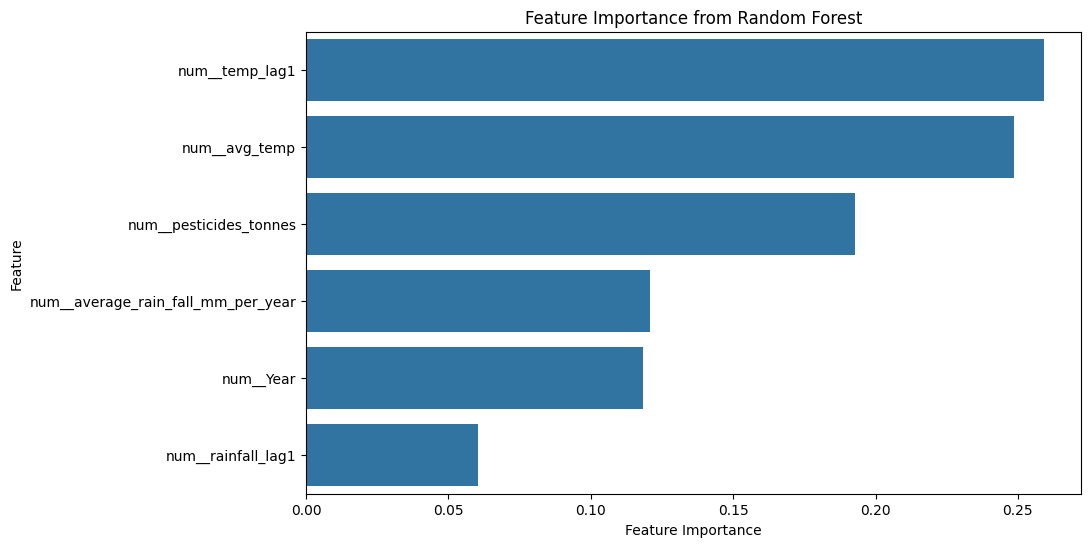

In [18]:
# Feature importance from Random Forest
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(rf_pipeline.named_steps['model'].feature_importances_, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

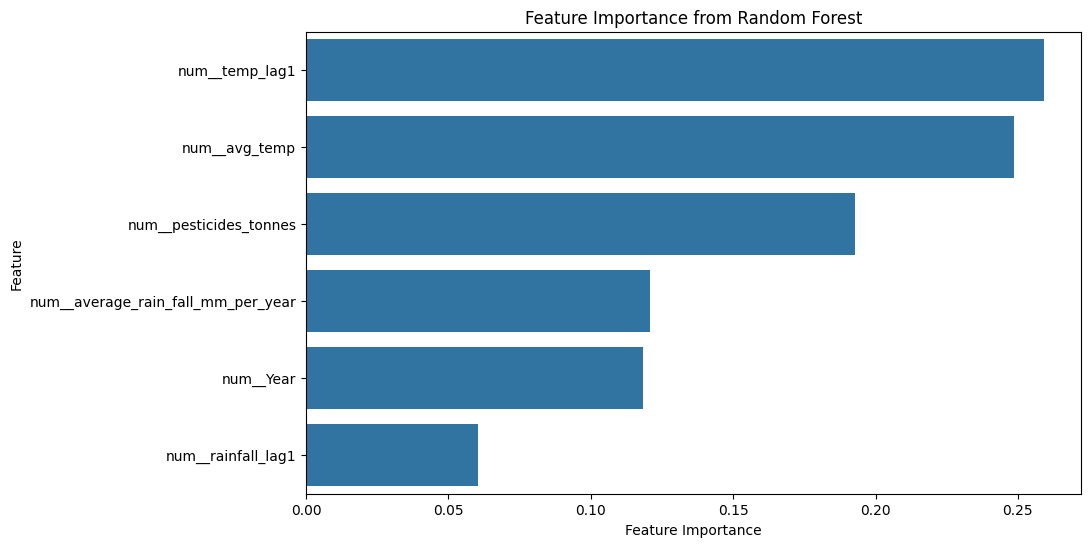

In [19]:
# Feature importance from Random Forest
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(rf_pipeline.named_steps['model'].feature_importances_, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

## Step 7: Model Interpretation
Determine which climate factors most significantly impact yields and assess model reliability and potential biases.

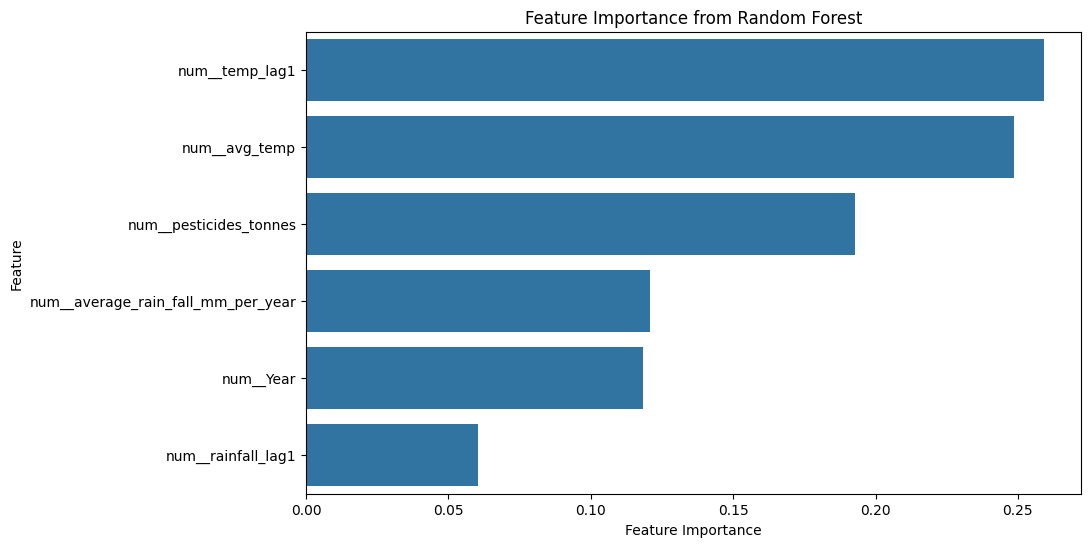

In [20]:
# Feature importance from Random Forest
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(rf_pipeline.named_steps['model'].feature_importances_, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

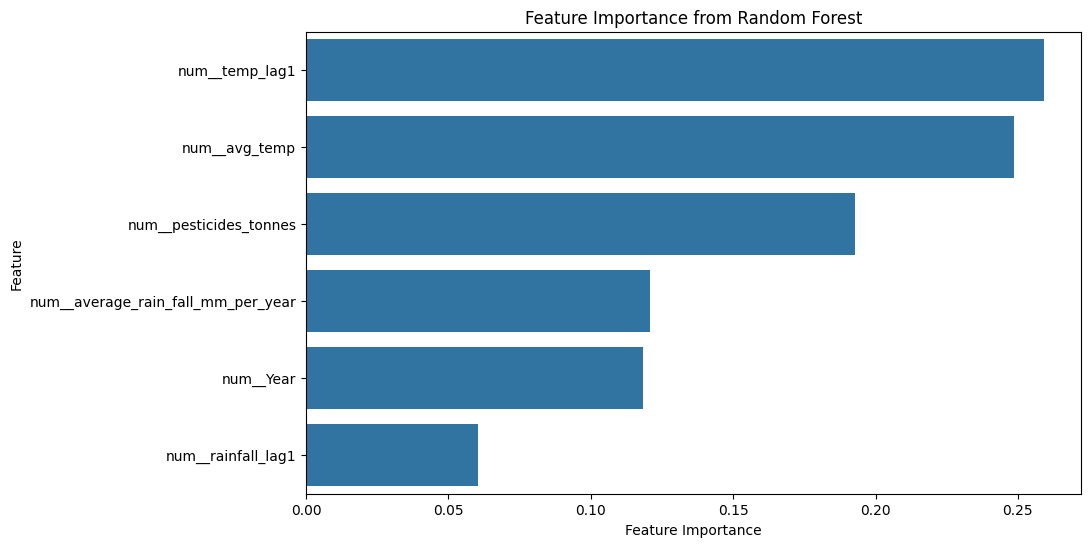

In [21]:
# Feature importance from Random Forest
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(rf_pipeline.named_steps['model'].feature_importances_, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

## Step 8: Conclusion
Provide insights for farmers on optimizing practices based on climate data.

Based on the analysis and model results, the following insights can be provided to farmers:
- The most significant climate factors impacting crop yields are identified.
- Recommendations on optimizing farming practices based on these factors can be made.